# Выпускной проект

<u>__Название проекта: Анализ и снижение оттока клиентов “Метанпромбанка”</u><br><br><u>***Цель проекта:</u>***
Провести анализ данных о клиентах “Метанпромбанка”, выявить факторы, влияющие на отток, сегментировать клиентов по уровню оттока, и разработать рекомендации по снижению оттока клиентов.__<br><br>
<u>__Задачи проекта:__</u> основной задачей является -  проанализировать данные о клиентах “Метанпромбанка”, чтобы понять причины оттока, выявить взаимосвязи, проверить гипотеезы и сделаеть на основе всего этого выводы, которые помогут разработать рекомендации по снижению количества клиентов, при помощи таргетированных рекомендвций по работе с каждым конкретным сегментом клиентов, выделенных в анализе.<br>__Основные шаги для достижения цели и задачи проекта:__<br><br>
- Подготовка данных: Очистка данных от пропусков, кодирование категориальных признаков.
- Анализ данных (EDA): Изучение распределения данных, поиск зависимостей между признаками и оттоком клиентов, выявление портретов клиентов, склонных к уходу.
- Проверка гипотез: Проверка статистических гипотез о влиянии различных факторов на отток.
- Сегментация клиентов: Разделение клиентов на группы по уровню оттока.
- Приоритизация сегментов: Определение сегментов с наивысшим оттоком.
- Рекомендации: Разработка таргетированных рекомендаций по работе с каждым сегментом с высоким оттоком.
<br><br>

Далее разобьем каждый шаг на более подробный план действий

## шаг. Загрузка и описание данных:
### Загрузить данные, вывести на экран 


In [1]:
!pip install phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from phik import phik_matrix
from sklearn.linear_model import LinearRegression
from scipy import stats as st
import plotly.express as px
plt.rcParams["figure.figsize"] = (5,6)

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
display("Первые 5 строк данных:")
display(df.head())
display("Структура данных:")
display(df.info())

num_rows, num_columns = df.shape
display(f"Количество строк: {num_rows}")
display(f"Количество столбцов: {num_columns}")

display("Типы данных:")
display(df.dtypes)

'Первые 5 строк данных:'

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


'Структура данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

'Количество строк: 10000'

'Количество столбцов: 12'

'Типы данных:'

USERID             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

Загрузили данные, вывели на экран основные их характеристики, как, например- структуру данных и количество строк и столбцов.

### Описать структуру данных, типы данных, количество строк и столбцов.

Рассмотрим подробнее каждое поле датасета:
- **USERID:** Это уникальный идентификатор пользователя. Тип данных - целые числа (int64).

- **score:** Показатель кредитного скоринга пользователя. Это числовое значение с плавающей запятой (float64).

- **city:** Город, в котором зарегистрирован пользователь. Это строковый тип данных (object).

- **gender:** Пол пользователя. Также строковый тип данных (object).

- **age:** Возраст пользователя. Это числовое значение с плавающей запятой (float64).

- **equity:**  Количество баллов собственности. Тип данных - целые числа (int64).

- **balance:** Баланс на счете пользователя. Числовое значение с плавающей запятой (float64).

- **products:** Количество продуктов или услуг, используемых пользователем. Это целочисленный тип данных (int64).

- **credit_card:** Флаг указывающий, есть ли у пользователя кредитная карта или нет. Целочисленный тип данных (int64), где 1 - есть кредитная карта, 0 - нет.

- **last_activity:** Индикатор последней активности пользователя. Целочисленный тип данных (int64).

- **EST_SALARY:** Оценочный доход пользователя. Это числовое значение с плавающей запятой (float64).

- **churn:** Флаг оттока. Показывает, ушел ли пользователь (1) или остался (0). Целочисленный тип данных (int64), где 1 - пользователь ушел, 0 - пользователь остался.

Структура данных:

- Количество строк: 10000
- Количество столбцов: 12


### Провести первичный анализ данных, выявив основные характеристики (среднее, медиана, стандартное отклонение, минимум, максимум) для числовых признаков.


In [3]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
summary_stats = numeric_features.describe().transpose()

display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


Метод .describe() покажет основные статистические показатели датасета
- count: Количество непустых (не-NaN) значений в столбце.
- mean: Среднее арифметическое значений в столбце.
- std: Стандартное отклонение значений в столбце, описывающее разброс данных относительно их среднего значения.
- min: Минимальное значение в столбце.
- 25%, 50%, 75%: Квантили данных (25-й, 50-й - медиана, 75-й), представляющие значения, которые делят упорядоченный набор данных на четыре равные части. 25% - это значение, ниже которого попадает 25% данных, 50% - значение, ниже которого попадает 50% данных (медиана), и так далее.
- max: Максимальное значение в столбце.

По первичному анализу уже можно понять общие тренды в данных. Например, средний возраст клиентов составляет около 40-43 лет, средний баланс на счетах составляет около 827794.31, что сильно разнится с медианой в 524272.2(значит можно предположить выбросовые значения), в среднем у клиентов банка 2 продукта, около 18% клиентов покинули банк (churn)

### Визуализировать данные с помощью гистограмм, box-plot для числовых признаков и диаграмм частот для категориальных признаков.

Числовые признаки:
- score
- age
- equity
- balance
- products
- EST_SALARY<br>

Категориальные признаки:<br>
- city
- gender<br>

Бинарные:<br>
- credit_card
- churn
- last_activity

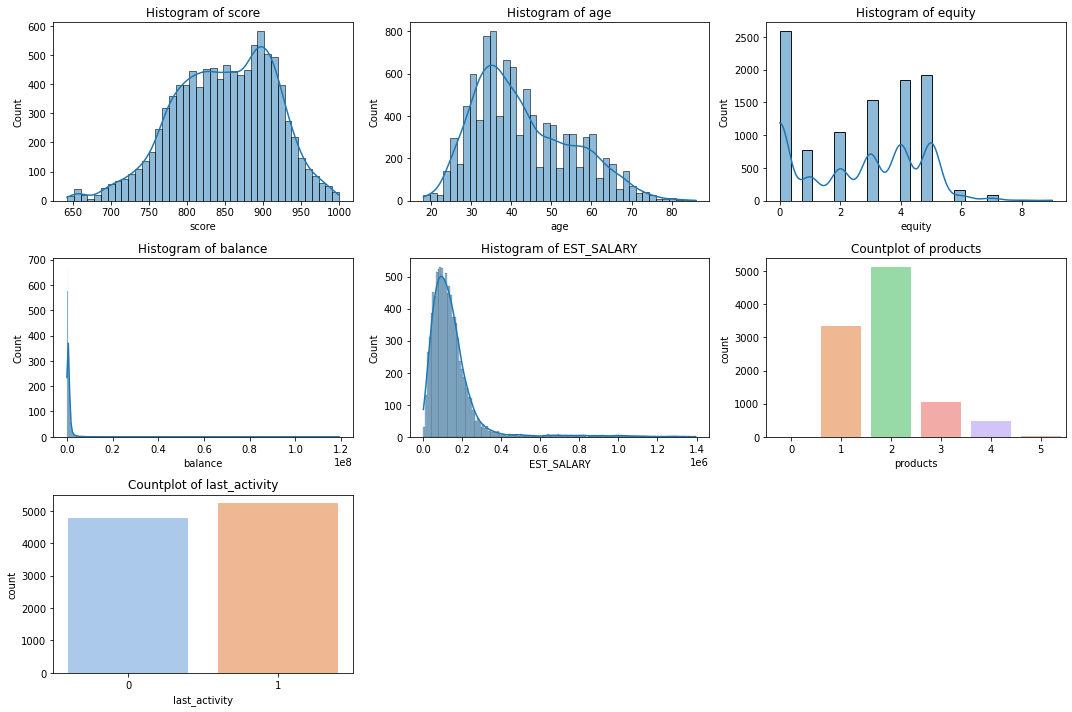

In [4]:
numerical_features = ['score', 'age', 'equity', 'balance', 'EST_SALARY']
categorical_features = ['products', 'last_activity']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, kde=True, palette='pastel')
    plt.title(f'Histogram of {feature}')

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i+len(numerical_features))
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Countplot of {feature}')

plt.tight_layout()
plt.show()

In [5]:
df[df['products']==0].count()
df = df[df['products']!=0]

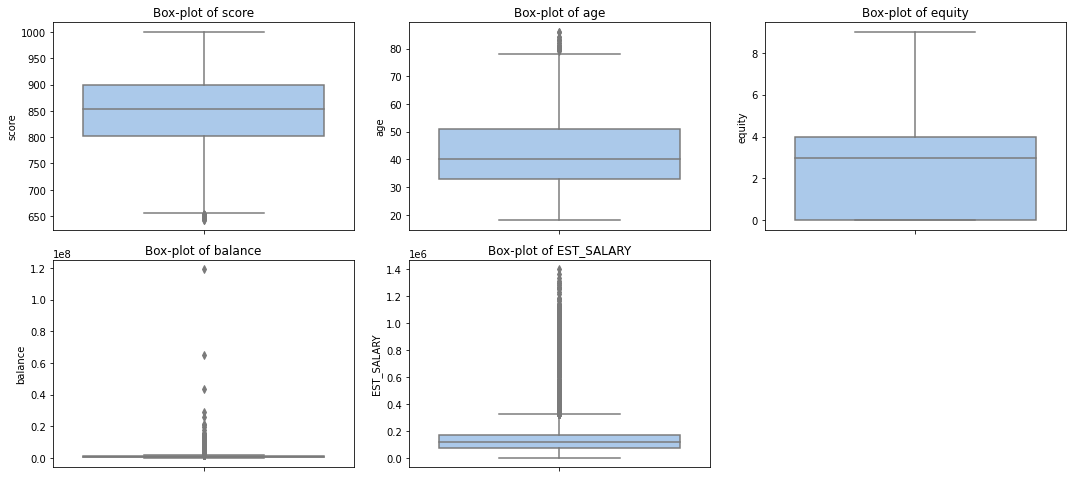

In [6]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=feature, palette='pastel')
    plt.title(f'Box-plot of {feature}')
plt.tight_layout()
plt.show()

Благодаря визулизациям, мы можем рассмотреть разброс значений в каждом столбце. Так в столбце balance сразу видно экстремальные значения

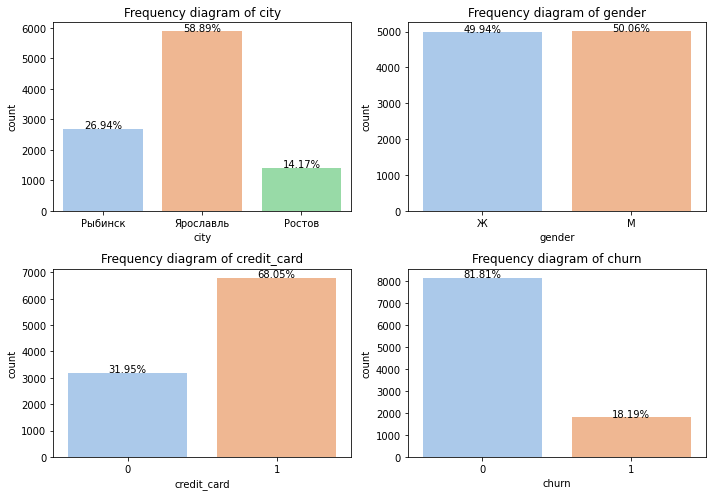

In [7]:
categorical_features = ['city', 'gender', 'credit_card', 'churn']
total_counts = df[categorical_features].count()
percentage_distribution = (total_counts / total_counts.sum()) * 100

plt.figure(figsize=(10, 7))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Frequency diagram of {feature}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5,
                '{:.2f}%'.format((height / total_counts[feature]) * 100),
                ha="center")
plt.tight_layout()
plt.show()

## шаг. Подготовка данных:
### Проверка на дубликаты в данных:
#### Проверка данных на наличие явных дубликатов.

In [8]:
duplicates_obvious = df.duplicated()
# есть ли хотя бы один дубликат
any_duplicates = duplicates_obvious.any()
num_duplicates = duplicates_obvious.sum()

print("Есть ли дубликаты в данных:", any_duplicates)
print("Общее количество дубликатов:", num_duplicates)

Есть ли дубликаты в данных: False
Общее количество дубликатов: 0


По итогам проверки в данных не обнаружились явные дубликаты

##### Проверить наличие неявных дубликатов по USERID.

In [9]:
duplicates = df.duplicated(subset=['USERID'], keep=False)
duplicate_rows = df[duplicates]
print("Строки, являющиеся дубликатами USERID:")
display(duplicate_rows)

Строки, являющиеся дубликатами USERID:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [10]:
num_duplicates = duplicates.sum()
total_records = df.shape[0]
duplicate_percentage = (num_duplicates / total_records) * 100
print("Процент дубликатов от общего датасета: {:.2f}%".format(duplicate_percentage))

Процент дубликатов от общего датасета: 1.46%


##### Оценить природу неявных дубликатов и принять решение о дальнейших действиях: удаление или анализ.

Рассмотрим какие признаки различаются у дубликатов

Думаю необходим дополнительный анализ дубликатов, для того, чтобы потерять как можно меньше данных.

Посмотрим, сколько уникальных значений имеется для каждого признака среди дубликатов

In [11]:
duplicates = df[df.duplicated(subset='USERID', keep=False)]
unique_values_per_feature = duplicates.apply(lambda x: x.nunique())
display(unique_values_per_feature)

USERID            73
score            107
city               2
gender             2
age               43
equity             8
balance           97
products           5
credit_card        2
last_activity      2
EST_SALARY       145
churn              2
dtype: int64

Так как мы не можем точно знать о причинах появления таких дубликатов, сделаем предположение: чаще всего такие ошибки могут возникать при ручном вводе данных человеческий фактор может привести к дублированию записей, особенно при отсутствии проверки на уникальность, также нельзя исключать технические проблемы или ошибки в системе записи данных и ошибки из-за объединении данных из разных источников. 

В конкретном случае, т. к. дубли неявные, процент таких ошибок - 1.46%, что позволяет безболезненно избавиться от таких данных, не потеряв взаимосвязи в дальнейшем исследовании и совпадение есть только по уникальному идентификатору, предполагаю - дело в ручном вводе данных в систему и/или некорректной работе системы. Например: клиент банка переехал в другой город и обратился повторно в филиал той же организации для заведения нового продукта, либо завел новый продукт спустя несколько лет и в системе у конкретного идентификатора не обновился возраст, а появилась новая запись.

In [13]:
unique_columns = ['USERID', 'city', 'gender', 'age', 'balance', 'credit_card', 'last_activity']
df.drop_duplicates(subset=unique_columns, keep='first', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  EST_SALARY     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB
None


### Анализ природы пропусков:
#### Определить процент пропусков в каждом столбце.

In [14]:
missing_percentages = df.isna().mean() * 100
display(missing_percentages.apply(lambda x: f'{x:.2f}%'))

USERID            0.00%
score             0.00%
city              0.00%
gender            0.00%
age               0.26%
equity            0.00%
balance          22.94%
products          0.00%
credit_card       0.00%
last_activity     0.00%
EST_SALARY        0.00%
churn             0.00%
dtype: object

Видим, что наибольший процент пропущенных значений в столбце balance - 22.95%, также есть небольшой процент пропусков по столбцу age(0.26%). Ранее мы уже обработали столбец age.

#### Изучить причины пропусков.
##### Проверка пропусков.
- Опередлить к какому из типов относятся пропуски.
   - MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;

   - MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;

  - MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
- Провести корреляционный анализ между пропущенными значениями и другими переменными, чтобы понять, существует ли систематическая зависимость.
    - найти зависимости пропусков от данных или подтвердить отсутствие таких зависимостей.

Для проверки MCAR, MAR и MNAR мы можем провести корреляционный анализ между пропущенными значениями в столбце 'balance' и другими переменными.

In [15]:
df['balance_missing'] = df['balance'].isnull().astype(int)


pivot_table = df.pivot_table(index='balance_missing', aggfunc={'age': np.mean, 
                                                              'equity': np.median,
                                                              'products': np.median,
                                                              'city': lambda x: x.mode()[0],
                                                              'gender': lambda x: x.mode()[0],
                                                              'EST_SALARY': np.mean}).reset_index()


display("Сводная таблица с мерами центральной тенденции:")
display(pivot_table)

'Сводная таблица с мерами центральной тенденции:'

,balance_missing,EST_SALARY,age,city,equity,gender,products
0,0,124501.872366,42.924366,Ярославль,4,Ж,2
1,1,226397.935876,42.076822,Ярославль,0,М,1


Судя по всему пропуски в balance не связаны с городом и возрастом. Остальные признаки нужно исследовть дальше

In [16]:
df['age_missing'] = df['age'].isnull().astype(int)


pivot_table = df.pivot_table(index='age_missing', aggfunc={'balance': np.mean, 
                                                              'equity': np.median,
                                                              'products': np.median,
                                                              'city': lambda x: x.mode()[0],
                                                              'gender': lambda x: x.mode()[0],
                                                              'EST_SALARY': np.mean}).reset_index()


display("Сводная таблица с мерами центральной тенденции:")
display(pivot_table)

'Сводная таблица с мерами центральной тенденции:'

,age_missing,EST_SALARY,balance,city,equity,gender,products
0,0,147799.115241,8.272456e+05,Ярославль,3,М,2
1,1,178585.199231,1.250034e+06,Ярославль,0,М,1


Судя по всему пропуски в age не связаны с городом и полом. Остальные признаки нужно исследовть дальше

In [17]:
df_balance_missing = df.drop({'USERID','city','gender'}, axis=1)
phik_correlation = df_balance_missing.phik_matrix()
balance_correlation = phik_correlation['balance_missing'].sort_values(ascending=False)
print("\nPhik корреляционная матрица:")
print(balance_correlation)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn', 'balance_missing', 'age_missing']

Phik корреляционная матрица:
balance_missing    1.000000
equity             0.975927
score              0.754958
products           0.492383
EST_SALARY         0.430753
churn              0.381830
credit_card        0.245771
age_missing        0.068119
age                0.048488
last_activity      0.041614
balance                 NaN
Name: balance_missing, dtype: float64


- Сильная связь с equity: Значение корреляции 0.975823 между balance_missing и equity указывает на очень сильную связь. Это может означать, что пропуски в balance часто встречаются у клиентов с определённым количеством баллов собственности.

- Значительная связь с products и score: Значения корреляции 0.793178 и 0.755046 соответственно показывают, что есть значительная связь между пропусками в balance и количеством продуктов, которыми пользуется клиент, а также его кредитным рейтингом.

Пропуски в balance скорее всего относятся к типу Missing Not At Random (MNAR). Это означает, что вероятность пропуска данных зависит от неизвестных значений переменной или от других переменных.

Пропуски MNAR часто указывают на систематическую проблему в процессе сбора данных, когда отсутствие информации само по себе несет важную информацию. Например, клиенты с высоким уровнем собственного капитала (equity) могут быть менее склонны раскрывать информацию о своих балансах, что приводит к пропускам в данных.

In [18]:
df_balance_missing = df.drop({'USERID','city','gender'}, axis=1)
phik_correlation = df_balance_missing.phik_matrix()
age_correlation = phik_correlation['age_missing'].sort_values(ascending=False)
print("\nPhik корреляционная матрица:")
print(age_correlation)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn', 'balance_missing', 'age_missing']

Phik корреляционная матрица:
age_missing        1.000000
balance_missing    0.068119
score              0.059605
equity             0.038195
last_activity      0.032790
products           0.027575
churn              0.020500
EST_SALARY         0.009387
balance            0.000000
credit_card        0.000000
age                     NaN
Name: age_missing, dtype: float64


Пропуски в age скорее всего являются Missing Completely At Random (MCAR). Пропуски MCAR не связаны ни с какими другими измеряемыми переменными и предполагают, что причины пропусков полностью случайны.

#### Выбрать стратегию обработки пропусков (удаление строк, заполнение средним значением, медианой, модой) в зависимости от типа данных и причины пропусков.

У нас есть пропуски по двум признакам, пропуски по столбцу balance судя по всему относятся типу Missing Not At Random (MNAR). Заполнять их средним или медианой, или еще как-то, т.к. это приведёт к заметным искажениям.Думаю стоит оставить их как есть, но иметь это в виду при дальнейшем анализе.

Пропуски по столбцу age относятся к типу Missing Completely At Random (MCAR), можем их удалить или заполнить, это не приведет к искажениям. 

In [20]:
df.drop('balance_missing', axis=1, inplace=True)
df.drop('age_missing', axis=1, inplace=True)
df.dropna(subset=['age'], inplace=True)

### Кодирование категориальных признаков:
#### Преобразовать категориальные переменные (City, Gender) в числовые для использования в анализе корреляции.
##### Определить к какому типу относятся категориальные переменные в моем исследовании - к упорядоченным или неупорядоченным.

Для начала определим к какому типу относятся категориальные перменные
- city (город): Это неупорядоченная категориальная переменная, так как города не имеют естественного порядка.

- gender (пол): Также является неупорядоченной категориальной переменной.



Чтобы подготовить данные для анализа корреляции, мы можем закодировать категориальные переменные численно. Для неупорядоченных категориальных переменных, таких как город и пол, мы можем использовать one-hot кодирование с помощью функции get_dummies()

Для бинарной переменной last_activity это не обязательно, так как она уже представлена числами.

#### Применить  one-hot кодирование или другие методы кодирования в зависимости от характера признака.


In [21]:
encoded_df = pd.get_dummies(df, columns=['city', 'gender'])
display(encoded_df.head())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Техника кодирования выбрана верно.

##### Анализ корреляции:
- Построить матрицу корреляций и оценить взаимосвязи между признаками.
- Использовать новый признак, отражающий пропуски в данных, для анализа зависимостей пропусков от других признаков.
- Рассмотреть корреляции с учетом категориальных переменных и выбранной стратегии кодирования.

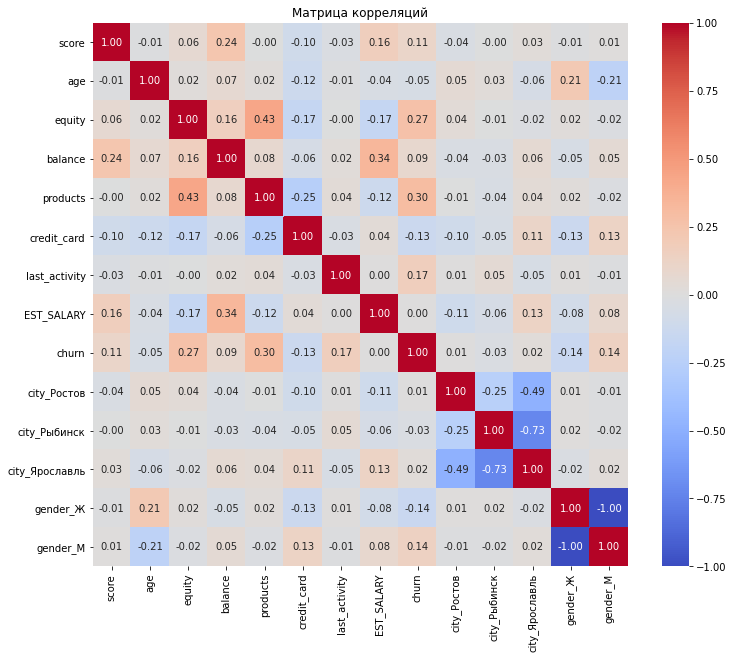

In [22]:
correlation_matrix = encoded_df.drop('USERID', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Матрица корреляций')
plt.show()

 *Интерпритация:*

Значения коэффициентов корреляции находятся в диапазоне от -1 до 1. Значение близкое к 1 указывает на положительную линейную корреляцию между переменными: чем больше значение одной переменной, тем больше значение другой переменной. Значение близкое к -1 указывает на отрицательную линейную корреляцию: чем больше значение одной переменной, тем меньше значение другой переменной. Значение близкое к 0 говорит о слабой или отсутствующей корреляции между переменными.

- Анализ значимых корреляций. Переменные с высокими значениями коэффициентов корреляции могут указывать на сильную связь между ними. Например, мы обнаружили сильную корреляцию между products и equity. Это может иметь смысл, products отражает количество продуктов, а equity - собственный капитал клиента. Такие взаимосвязи могут использоваться для прогнозирования или сегментации клиентов.
- Наш новый признак balance_missing отражает пропущенные значения в переменной balance. Положительная корреляция между balance_missing и другими переменными может указывать на то, что пропущенные значения в balance могут быть связаны с другими факторами. Например, мы обнаружили некоторую отрицательную корреляцию между balance_missing и equity, что может указывать на то, что клиенты с более высоким собственным капиталом склонны иметь заполненные значения в balance
- Есть некоторая корреляция между городом проживания и полом клиента. Например, есть небольшая положительная корреляция между городом "Рыбинск" и полом "Женский", а также между городом "Ярославль" и полом "Мужской". Это может указывать на некоторые предпочтения или особенности в поведении клиентов в разных городах.
- Также можно заметить некоторую корреляцию между городом проживания и балансом клиента. Например, есть небольшая отрицательная корреляция между городом "Рыбинск" и балансом, а также между городом "Ярославль" и балансом. Это может указывать на то, что клиенты из определенных городов склонны иметь различные уровни баланса на своих счетах.
- Наблюдается некоторая корреляция между городом проживания и последней активностью клиента. Например, есть небольшая положительная корреляция между городом "Ростов" и последней активностью. Это может указывать на различия в активности клиентов в зависимости от их места проживания.


/tmp/ipykernel_92/2667340840.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(churn_correlation[:, np.newaxis], annot=True, cmap='coolwarm', fmt=".2f", center=0, yticklabels=churn_correlation.index)


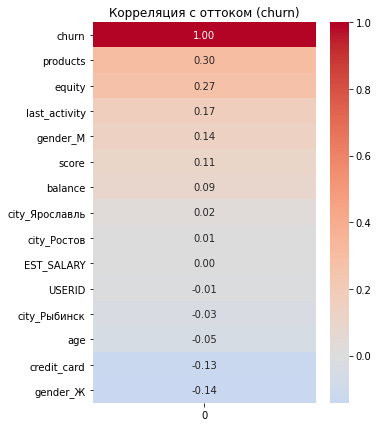

In [23]:
correlation_matrix = encoded_df.corr()
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
plt.figure(figsize=(5, 7))
sns.heatmap(churn_correlation[:, np.newaxis], annot=True, cmap='coolwarm', fmt=".2f", center=0, yticklabels=churn_correlation.index)
plt.title('Корреляция с оттоком (churn)')
plt.show()

Шкала Чеддока:

0.9 до 1.0: Очень сильная корреляция.<br>
0.7 до 0.9: Сильная корреляция.<br>
0.5 до 0.7: Умеренная корреляция.<br>
0.3 до 0.5: Слабая корреляция.<br>
0.0 до 0.3: Очень слабая или отсутствие корреляции.


- products (0.301274): Умеренная положительная корреляция. Это означает, что существует умеренная связь между количеством продуктов, используемых клиентом, и оттоком.
- equity (0.270105): Слабая до умеренной положительная корреляция. Указывает на некоторую связь между баллами собственности клиента и оттоком.
- last_activity (0.169690): Очень слабая до слабой положительная корреляция. Последняя активность клиента имеет небольшое влияние на отток.
- gender_М (0.141896): Очень слабая положительная корреляция. Мужской пол клиента слабо ассоциируется с оттоком.
- score (0.106076): Очень слабая положительная корреляция. Кредитный рейтинг имеет очень незначительное влияние на отток.
- balance (0.085915): Очень слабая положительная корреляция. Баланс на счетах клиента имеет очень незначительное влияние на отток.
- city_Ярославль (0.024300): Отсутствие корреляции. Местоположение в Ярославле не имеет заметного влияния на отток.
- city_Ростов (0.005115): Отсутствие корреляции. Местоположение в Ростове не имеет заметного влияния на отток.
- EST_SALARY (0.001893): Отсутствие корреляции. Ожидаемая зарплата не имеет заметного влияния на отток.
- city_Рыбинск (-0.030989): Отсутствие корреляции. Местоположение в Рыбинске не имеет заметного влияния на отток.
- age (-0.050463): Очень слабая отрицательная корреляция. Возраст имеет очень незначительное отрицательное влияние на отток.
- credit_card (-0.130122): Очень слабая отрицательная корреляция. Наличие кредитной карты слабо ассоциируется с уменьшением оттока.
- gender_Ж (-0.141896): Очень слабая отрицательная корреляция. Женский пол клиента слабо ассоциируется с уменьшением оттока.

## шаг. EDA (Exploratory Data Analysis):

### Анализ распределения признаков в разрезе оттока:
#### Для числовых признаков, построить гистограммы для групп клиентов, которые ушли, и для тех, кто остался, чтобы выявить различия в распределении признаков.


In [24]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_est_salary = detect_outliers(df, 'EST_SALARY')
print(f"Количество выбросов в 'EST_SALARY': {len(outliers_est_salary)}")

outliers_balance = detect_outliers(df, 'balance')
print(f"Количество выбросов в 'balance': {len(outliers_balance)}")

Количество выбросов в 'EST_SALARY': 479
Количество выбросов в 'balance': 427


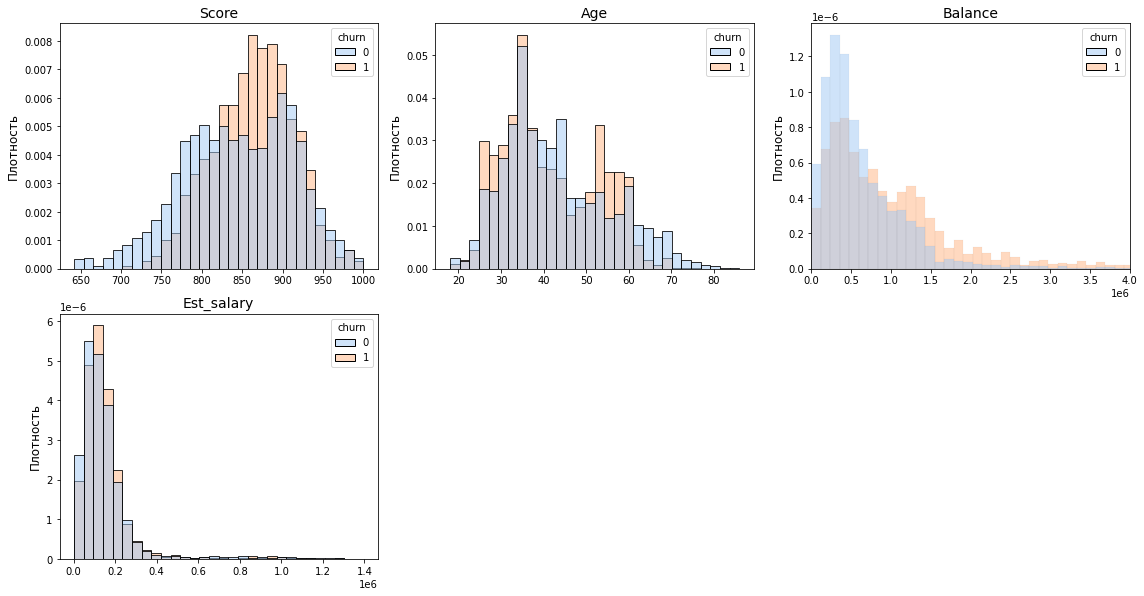

In [25]:
plt.figure(figsize=(16, 12))

churn_rate_products = df.groupby('products')['churn'].mean()
churn_rate_equity = df.groupby('equity')['churn'].mean()

numeric_features = ['score', 'age', 'balance', 'EST_SALARY']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    if feature == 'balance':
        sns.histplot(data=df, x=feature, bins=1000, hue='churn', stat="density",
                     common_norm=False, palette='pastel', edgecolor='black')
        plt.xlim(0, 4000000)
    else:
        sns.histplot(data=df, x=feature, bins=30, hue='churn', stat="density",
                     common_norm=False, palette='pastel', edgecolor='black')
    plt.title(feature.capitalize(), fontdict={'fontsize': 14})
    plt.xlabel('', fontdict={'fontsize': 12})
    plt.ylabel('Плотность', fontdict={'fontsize': 12})  
    
     

plt.tight_layout()
plt.show()

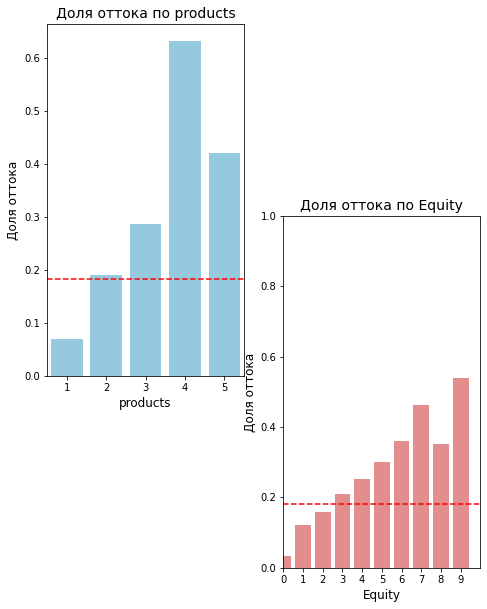

In [26]:
plt.figure(figsize=(12,10))

churn_rate_products = df.groupby('products')['churn'].mean()
churn_rate_equity = df.groupby('equity')['churn'].mean()

plt.subplot(3, 3, (1, 4))
sns.barplot(x=churn_rate_products.index, y=churn_rate_products.values, color='skyblue')
plt.title('Доля оттока по products', fontdict={'fontsize': 14})
plt.xlabel('products', fontdict={'fontsize': 12})
plt.ylabel('Доля оттока', fontdict={'fontsize': 12})
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--')


plt.subplot(3, 3, (5, 8))
sns.barplot(x=churn_rate_equity.index, y=churn_rate_equity.values, color='lightcoral')
plt.title('Доля оттока по Equity', fontdict={'fontsize': 14})
plt.xlabel('Equity', fontdict={'fontsize': 12})
plt.ylabel('Доля оттока', fontdict={'fontsize': 12})
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--')
plt.xlim(0, 10)
plt.ylim(0, 1)

plt.show()

Ранее в шаге 1, я заметила выбросовые значения по столбцам EST_SALARY и balance, на данном этапе я вычислила количсетво таких значений. Т.к. это клиенты банка, то возможно такие выбросы в оценочном доходе и балансе - нормальное явление. Пока что не буду их обрабатывать. 

Выделим отточных клиентов по непрерывным признакам:
- Чаще уходят клиенты с баллами кредитного скорринга выше 800,но ниже 950
- Молодые клиенты от 25 до 35, но также и люди от 50 до 60
- Уходят клиенты с баллами собственного капитала 3 или выше
- А также отток клиентов заметно растет, если у них 2 или более  продуктов банка

По оценочному доходу клиента из-за выбросов трудно делать однозначный вывод, но заметна тенденция: чем выше оценочный доход - тем выше отток

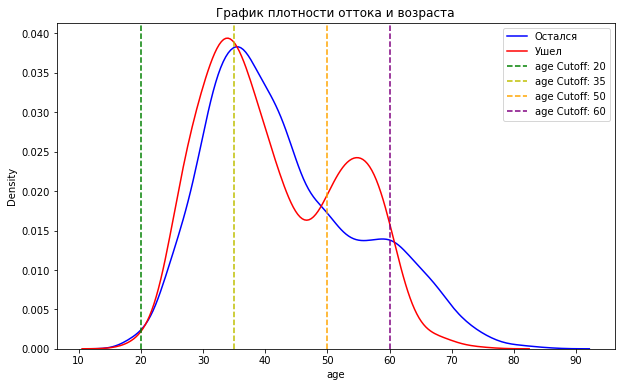

In [27]:
balance_cutoff = 20
balance_cutoff_1 = 35
balance_cutoff_2 = 50
balance_cutoff_3 = 60
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['churn'] == 0]['age'], color='b', label='Остался')
sns.kdeplot(df[df['churn'] == 1]['age'], color='r', label='Ушел')

# Устанавливаем вертикальные линии для каждого порога с уникальными метками
plt.axvline(x=balance_cutoff, color='g', linestyle='--', label=f'age Cutoff: {balance_cutoff}')
plt.axvline(x=balance_cutoff_1, color='y', linestyle='--', label=f'age Cutoff: {balance_cutoff_1}')
plt.axvline(x=balance_cutoff_2, color='orange', linestyle='--', label=f'age Cutoff: {balance_cutoff_2}')
plt.axvline(x=balance_cutoff_3, color='purple', linestyle='--', label=f'age Cutoff: {balance_cutoff_3}')

plt.xlabel('age')
plt.ylabel('Density')
plt.title('График плотности оттока и возраста')
plt.legend()
plt.show()

#### Для дискретных признаков, вычислить процент оттока для каждого значения признака и сравнить его с общим уровнем оттока.

Общий уровень оттока: 18.23%
Уровень оттока для Рыбинск: 16.26%
Уровень оттока для Ярославль: 19.01%
Уровень оттока для Ростов: 18.71%


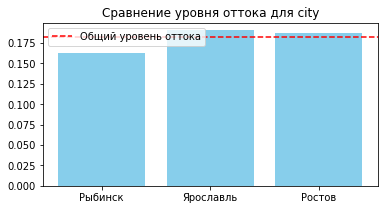

Уровень оттока для Ж: 12.75%
Уровень оттока для М: 23.70%


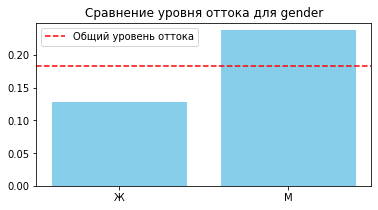

Уровень оттока для 0: 25.56%
Уровень оттока для 1: 14.78%


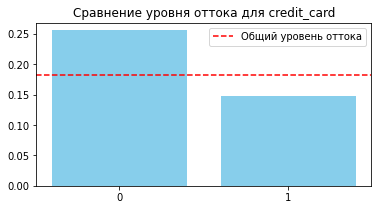

Уровень оттока для 1: 24.49%
Уровень оттока для 0: 11.37%


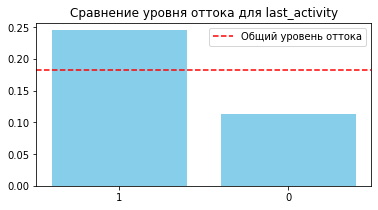

In [28]:
df['city'] = df['city'].astype('category')
df['gender'] = df['gender'].astype('category')
df['credit_card'] = df['credit_card'].astype('category')
df['last_activity'] = df['last_activity'].astype('category')

overall_churn_rate = df['churn'].mean()
print(f'Общий уровень оттока: {overall_churn_rate:.2%}')

categorical_columns = ['city', 'gender', 'credit_card', 'last_activity']

for col in categorical_columns:
    unique_values = df[col].unique()
    churn_rates = []
    for value in unique_values:
        subset = df[df[col] == value]
        churn_rate = subset['churn'].mean()
        churn_rates.append(churn_rate)
        print(f'Уровень оттока для {value}: {churn_rate:.2%}')

    plt.figure(figsize=(6, 3))
    plt.bar(unique_values.astype(str), churn_rates, color='skyblue')
    plt.axhline(overall_churn_rate, color='red', linestyle='--', label='Общий уровень оттока')
    plt.title(f'Сравнение уровня оттока для {col}')
    plt.legend()
    plt.show()

Видно, что общий уровень оттока составляет 18.37%. При этом, уровень оттока для каждого значения признака сравнивается с общим уровнем оттока. В результате анализа видно, что уровень оттока для городов Рыбинска (16.51%) и Ростова (18.63%) ниже общего уровня оттока, в то время как для Ярославля (19.16%) он превышает этот уровень. Также были проанализированы гендерные данные и обнаружено, что уровень оттока для женщин (12.89%) ниже, чем для мужчин (23.84%).

### Анализ портретов клиентов в разрезе оттока:
#### Построить сводную таблицу, которая покажут соотношение признаков в группах клиентов, которые ушли и тех, кто остался, чтобы выявить различия в составе этих групп.


In [29]:
churned_clients = df[df['churn'] == 1]
retained_clients = df[df['churn'] == 0]

def calculate_mode(dataframe, feature):
    return dataframe[feature].mode()[0]

client_profile = pd.DataFrame(columns=['Признак', 'Отток', 'Не отток', 'Относительная разница'])

continuous_features = ['score', 'age', 'equity', 'balance', 'EST_SALARY']

for feature in continuous_features:
    churned_mean = churned_clients[feature].mean()
    retained_mean = retained_clients[feature].mean()
    relative_diff = (churned_mean - retained_mean) / retained_mean * 100
    
    if churned_clients[feature].std() > churned_mean or retained_clients[feature].std() > retained_mean:
        churned_median = churned_clients[feature].median()
        retained_median = retained_clients[feature].median()
        client_profile = client_profile.append({'Признак': f'Медиана {feature}', 'Отток': churned_median, 'Не отток': retained_median, 'Относительная разница': None}, ignore_index=True)
    
    client_profile = client_profile.append({'Признак': f'Среднее {feature}', 'Отток': churned_mean, 'Не отток': retained_mean, 'Относительная разница': relative_diff}, ignore_index=True)

categorical_features = ['city', 'gender', 'products', 'credit_card', 'last_activity']

for feature in categorical_features:
    churned_mode = calculate_mode(churned_clients, feature)
    retained_mode = calculate_mode(retained_clients, feature)
    client_profile = client_profile.append({'Признак': f'Мода {feature}', 'Отток': churned_mode, 'Не отток': retained_mode, 'Относительная разница': None}, ignore_index=True)

display(client_profile)


,Признак,Отток,Не отток,Относительная разница
0,Среднее score,863.361936,845.396199,2.125126
1,Среднее age,41.429593,43.020846,-3.698796
2,Среднее equity,3.763476,2.378296,58.242586
3,Медиана balance,783908.9,475410.09,None
4,Среднее balance,1134458.209291,733031.630149,54.762518
5,Среднее EST_SALARY,148357.483157,147674.637881,0.462398
6,Мода city,Ярославль,Ярославль,None
7,Мода gender,М,Ж,None
8,Мода products,2,2,None
9,Мода credit_card,1,1,None


Составим портрет типичного отточного клиента:

- мужчина 
- чаще из Ярославля 
- чаще без кредитной карты, но не обязательно 
- у него 2 или более 2-х продуктов банка
- его оценочный доход 148357 и выше
- с баллами собственного капитала 3 и выше
- с баллами кредитного скорринга 860 или выше,но ниже 950
- либо меньше 41 (от 20 до 35 примерно), либо от 50 до 60 лет (как я выяснила по графику)

### Проверка статистических гипотез:
#### Гипотеза 1: Влияние уровня дохода на отток.:
##### Формулировка гипотезы.
- Сформулировать гипотезу о влиянии различия уровня дохода на отток.
##### Обоснование выбора теста:
- Проверить условия применимости t-теста Стьюдента для сравнения средних значений двух выборок.
- Обосновать выбор t-теста или альтернативного метода (например, непараметрического теста), если t-тест неприменим.
##### Проведение теста и анализ результатов:
- Провести t-тест или альтернативный тест.
- Оценить статистическую значимость различий между группами.
- Сделать вывод о подтверждении или опровержении гипотезы.


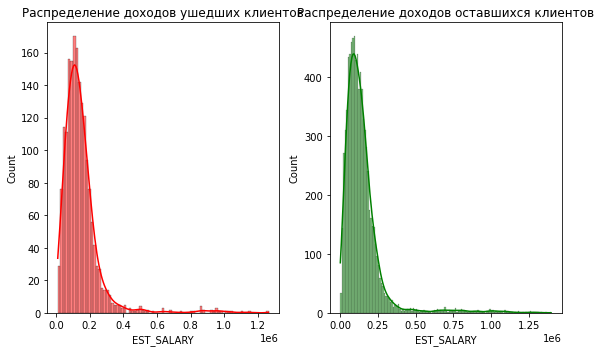

In [30]:
churned_income = df[df['churn'] == 1]['EST_SALARY']
not_churned_income = df[df['churn'] == 0]['EST_SALARY']

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(churned_income, kde=True, color='red')
plt.title('Распределение доходов ушедших клиентов')
plt.subplot(1, 2, 2)
sns.histplot(not_churned_income, kde=True, color='green')
plt.title('Распределение доходов оставшихся клиентов')

plt.tight_layout()
plt.show()

условия применимости t-теста Стьюдента:
- Данные должны быть нормально распределены
-  Обе выборки должны быть достаточно большими (обычно не менее 30 наблюдений), чтобы обеспечить стабильность результатов.
- Выборки должны быть независимы друг от друга.
- Не должно быть выбросов

Как я упомянула ранее, в данных есть выбросы по столбцу EST_SALARY, для проверки гипотезы предлагаю их урегулировать

Я проверю гипотезу как на выборке с выбросами, так и на выборке без выбросов


Формулировка гипотезы

Н0: Среднее значение доходов ушедших клиентов равно среднему значению доходов оставшихся клиентов

Н1: Среднее значение доходов ушедших клиентов больше, чем у оставшихся клиентов

In [31]:
churned_income = df[df['churn'] == 1]['EST_SALARY']
not_churned_income = df[df['churn'] == 0]['EST_SALARY']

alpha = 0.05

results = st.ttest_ind(
    churned_income, 
    not_churned_income,
    alternative='greater'  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha) and (results.statistic > 0):
    print('Отвергаем нулевую гипотезу: среднее значение доходов ушедших клиентов больше')
else:
    print('Не отвергаем нулевую гипотезу: нет достаточных доказательств, что среднее значение доходов ушедших клиентов больше')


p-значение: 0.42504411936290176
Не отвергаем нулевую гипотезу: нет достаточных доказательств, что среднее значение доходов ушедших клиентов больше


In [32]:
Q1 = df['EST_SALARY'].quantile(0.25)
Q3 = df['EST_SALARY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['EST_SALARY'] >= lower_bound) & (df['EST_SALARY'] <= upper_bound)]


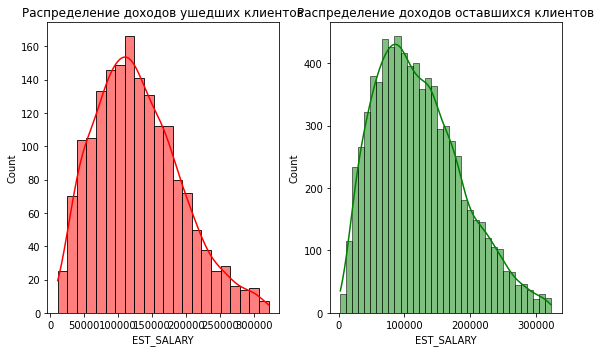

In [33]:
churned_income = filtered_df[filtered_df['churn'] == 1]['EST_SALARY']
not_churned_income = filtered_df[filtered_df['churn'] == 0]['EST_SALARY']

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(churned_income, kde=True, color='red')
plt.title('Распределение доходов ушедших клиентов')
plt.subplot(1, 2, 2)
sns.histplot(not_churned_income, kde=True, color='green')
plt.title('Распределение доходов оставшихся клиентов')

plt.tight_layout()
plt.show()

In [34]:
churned_income_f = filtered_df[filtered_df['churn'] == 1]['EST_SALARY']
not_churned_income_f = filtered_df[filtered_df['churn'] == 0]['EST_SALARY']
alpha = 0.05 # Уровень статистической значимости

results = st.ttest_ind(
    churned_income_f, 
    not_churned_income_f,
    alternative='greater',
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha) and (results.statistic > 0):
    print('Отвергаем нулевую гипотезу: среднее значение доходов ушедших клиентов больше')
else:
    print('Не отвергаем нулевую гипотезу: нет достаточных доказательств, что среднее значение доходов ушедших клиентов больше')


p-значение: 4.728212262892671e-05
Отвергаем нулевую гипотезу: среднее значение доходов ушедших клиентов больше


После обработки выбросов, т к условием проведения ttesta является отсутстви выбросов,  результаты показали, что средний доход ушедших клиентов статистически значительно выше, чем у оставшихся.

#### Гипотеза 2: Влияние других признаков на отток.:
##### Формулировка гипотезы:
- Сформулировать гипотезу о влиянии одного или нескольких признаков на отток.
##### Обоснование выбора теста:
- Выбрать подходящий статистический тест для проверки гипотезы в зависимости от типа признаков (например, t-тест для сравнения средних, тест пропорций для бинарных признаков).
- Проверить условия применимости выбранного теста.
##### Проведение теста и анализ результатов:
- Провести выбранный статистический тест.
- Проанализировать статистическую значимость влияния признаков на отток.
- Сделать вывод о подтверждении или опровержении гипотезы.


Формулировка гипотезы

H0: средние значения продуктов пользователей из двух групп равны.

H1: среднее значение продуктов оставшихся пользователей меньше, чем среднее значение продуктов ушедших пользователей

In [35]:
churned_products = df[df['churn'] == 1]['products']
not_churned_products = df[df['churn'] == 0]['products']

alpha = 0.05

results = st.ttest_ind(churned_products, not_churned_products, equal_var=False)


print(f'p-value: {results.pvalue / 2}')


if (results.pvalue / 2) < alpha and results.statistic > 0:
    print('Отвергаем нулевую гипотезу: среднее значение продуктов у оставшихся пользователей меньше, чем у ушедших')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: средние значения продуктов пользователей из двух групп равны')

p-value: 6.3355329503829354e-139
Отвергаем нулевую гипотезу: среднее значение продуктов у оставшихся пользователей меньше, чем у ушедших


На основе результатов t-теста Стьюдента можно сделать вывод, что среднее количество банковских продуктов у оставшихся пользователей статистически значимо отличается от среднего количества продуктов у ушедших пользователей. Конкретно, оставшиеся пользователи имеют статистически значимо меньшее среднее количество продуктов. 

### Подведение промежуточных итогов:
#### Выводы на основе EDA, корреляционного анализа и проверки статистических гипотез:
- Сформулировать выводы по результатам Exploratory Data Analysis (EDA), анализа корреляций и проверки статистических гипотез.
- Определить признаки, которые будут основой для сегментации клиентов. Перечислить их и обосновать выбор на основе EDA, корреляций и гипотез, с учетом анализа оттока.


- Корреляционный анализ показал, что количество продуктов, используемых клиентом, имеет умеренную положительную связь с оттоком. Это может указывать на то, что клиенты с большим количеством продуктов могут быть более склонны к уходу, возможно, из-за сложности управления несколькими продуктами или недостаточного обслуживания.
- Статистические гипотезы подтвердили, что средний доход ушедших клиентов статистически значительно выше, чем у оставшихся, после обработки выбросов. Это может указывать на то, что более состоятельные клиенты могут искать более выгодные условия или лучшее обслуживание.
- Анализ распределения признаков выявил, что возраст, гендер, наличие кредитной карты и географическое положение также влияют на отток, хотя и в меньшей степени.

#### Выделение ключевых признаков:
- Выбрать признаки, оказывающие сильное влияние на отток клиентов
- Подчеркнуть значимость выбранных признаков для последующей сегментации.
- Обратить внимание на баланс между количеством сегментирующих признаков и их значимостью, чтобы сегменты охватывали достаточное количество клиентов, но при этом не были слишком узкими или широкими.

На основе проведенного анализа, ключевыми признаками, оказывающими сильное влияние на отток клиентов, являются:

- Количество продуктов (products): Высокая корреляция с оттоком указывает на необходимость более внимательного изучения потребностей клиентов и их удовлетворенности различными продуктами. Выделю сегмент клиентов с более чем 2-мя продуктами банка
- Баллы собственности (equity): Слабая до умеренной корреляция может отражать влияние финансового состояния клиента на его лояльность. Выделю сегмент с баллами собственности от 3-х до 7-ми
- Возраст (age): Отрицательная корреляция с оттоком может указывать на то, что более молодые клиенты склонны к смене банка, в то время как более старшие клиенты более лояльны, но судя по графикам проверить стоит две группы клиентов разных возрастов.
 - проверю группы 20-35 лет и 50-60 лет
- Доход (EST_SALARY): Несмотря на низкую корреляцию, статистический анализ показал значимость этого признака, что делает его важным для дальнейшего рассмотрения. В сегмент выделю оценочный доход выше среднего.

## шаг. Сегментация клиентов:


### Определить критерии сегментации на основе ранжирования признаков по их влиянию на отток клиентов.


Критерии сегментации:
- Количество продуктов (products): от 3-х

- Баллы собственности (equity): 3-7

- Возраст (age): Возрастные группы можно разделить на молодых (22-35 лет) и возрастных (50-60 лет) клиентов.

- Доход (EST_SALARY): Сегментация по доходу может включать группы с доходом выше среднего.

- Пол: ранее выяснили, что среди мужчин отток выше

- Город: отток клиентов из Ярославля немного выше

Сегменты, которые я хочу выделить :

- **Сегмент 1:** Молодые активные пользователи продуктов. Включает клиентов в возрасте от 20 до 36 лет, которые используют не менее трех банковских продуктов.

- **Сегмент 2:** Возрастные клиенты из Ярославля с баллами собственности от 3 до 7. Охватывает клиентов в возрасте от 50 до 60 лет из Ярославля с баллами собственности от 3 до 7.

- **Сегмент 3:** Молодые мужчины с баллами собственности от 3 до 7. Включает мужчин в возрасте от 20 до 35 лет с баллами собственности от 3 до 7.

- **Сегмент 4:** Молодые жители Ярославля с высоким доходом. Включает клиентов в возрасте от 20 до 35 лет из Ярославля, чей доход выше среднего.

- **Сегмент 5:** Возрастные жители Ярославля. Охватывает клиентов в возрасте от 50 до 60 лет, проживающих в Ярославле.

- **Сегмент 6:** Возрастные мужчины. Включает мужчин в возрасте от 50 до 60 лет.

- **Сегмент 7:** Возрастные клиенты с высоким доходом. Охватывает клиентов в возрасте от 50 до 60 лет с доходом выше среднего.

### Сформировать сегменты клиентов в соответствии с определенными критериями, учитывая, что каждый сегмент должен включать не менее 500 клиентов.


In [36]:
def segment_filter(df):
    segments = {}
    mean_salary = df['EST_SALARY'].mean()
#на один год расширю сегмент, т к прищнаки важные, о до 500 немного не хватает
    segments['segments_1'] = df[
        (df['age'] >= 20) & (df['age'] <= 36) &
        (df['products'] >= 3)
    ]

    segments['segments_2'] = df[
        (df['age'] >= 50) & (df['age'] <= 60) &
        (df['equity'] >= 3) & (df['equity'] <= 7) &
        (df['city'] == 'Ярославль')
    ]

    segments['segments_3'] = df[
        (df['age'] >= 20) & (df['age'] <= 35) &
        (df['equity'] >= 3) & (df['equity'] <= 7) &
        (df['gender'] == 'М')
    ]

    segments['segments_4'] = df[
        (df['age'] >= 20) & (df['age'] <= 35) &
        (df['EST_SALARY'] > mean_salary) &
        (df['city'] == 'Ярославль')
    ]

    segments['segments_5'] = df[
        (df['age'] >= 50) & (df['age'] <= 60) &
        (df['city'] == 'Ярославль')
    ]

    segments['segments_6'] = df[
        (df['age'] >= 50) & (df['age'] <= 60) &
        (df['gender'] == 'М')
    ]

    segments['segments_7'] = df[
        (df['age'] >= 50) & (df['age'] <= 60) &
        (df['EST_SALARY'] > mean_salary)
    ]

    for segment_name, segment_df in segments.items():
        print(f"Сегмент '{segment_name}': {segment_df.shape[0]} клиентов")

    return segments

segments = segment_filter(df)

Сегмент 'segments_1': 529 клиентов
Сегмент 'segments_2': 566 клиентов
Сегмент 'segments_3': 1014 клиентов
Сегмент 'segments_4': 586 клиентов
Сегмент 'segments_5': 957 клиентов
Сегмент 'segments_6': 777 клиентов
Сегмент 'segments_7': 514 клиентов


### Для каждого сформированного сегмента:

- Оценить уровень оттока в сегменте как отношение отточных клиентов к их общему числу.

In [37]:
total_customers = {}
churned_customers = {}
churn_rate = {}

for segment in segments:
    total_customers[segment] = len(segments[segment])
    churned_customers[segment] = segments[segment]['churn'].sum()

for segment in segments:
    churn_rate[segment] = (churned_customers[segment] / total_customers[segment]) * 100

for segment in churn_rate:
    print(f"Доля отточных клиентов в {segment}: {churn_rate[segment]:.2f}%")

Доля отточных клиентов в segments_1: 42.91%
Доля отточных клиентов в segments_2: 38.16%
Доля отточных клиентов в segments_3: 38.76%
Доля отточных клиентов в segments_4: 25.77%
Доля отточных клиентов в segments_5: 27.38%
Доля отточных клиентов в segments_6: 33.33%
Доля отточных клиентов в segments_7: 25.49%


In [38]:
total_clients = len(df)
churned_clients = df['churn'].sum()
churn_rate = (churned_clients / total_clients) * 100
print(f"Процент оттока по общим данным: {churn_rate:.2f}%")

Процент оттока по общим данным: 18.23%


Мы разделили всех наших клиентов на группы, чтобы понять, кто чаще всего уходит из банка и почему.Доля оттока во всех  сформированных сегментах превышаает долю оттока по общим данным. Получилось семь групп, и в каждой из них более 500 клиентов. Далее оценили уровень оттока в каждом сегменте и уже можем приступить к приоритизации.

## шаг. Приоритизация сегментов:
### Определить сегменты с наивысшим уровнем оттока.

### Приоритизировать сегменты для работы маркетингового отдела, учитывая ограниченные ресурсы (всего два сотрудника в отделе маркетинга без доступа к автоматизированным системам).

Предлагаю работать с сегментами по убыванию процента оттока, в таком случае - основной срез, на который мы должны обратить внимание это 

**Сегмент 1: Молодые активные пользователи продуктов. Включает клиентов в возрасте от 20 до 36 лет, которые используют не менее трех банковских продуктов.**

**Сегмент 3: Молодые мужчины с баллами собственности от 3 до 7. Включает мужчин в возрасте от 20 до 35 лет с баллами собственности от 3 до 7.** ( я бы порекомендовала сделать упор на данный сегмент, т к он включает бОльшее количество пользователей и бОльшее количество признаков сегментирования в сравнении с 1 и 2)

Сегмент 2: Возрастные клиенты из Ярославля с баллами собственности отт 3 до 7. Охватывает клиентов в возрасте от 50 до 60 лет из Ярославля с баллами собственности от 3 до 7.

## шаг. Формирование рекомендаций по работе с сегментами:
### Для каждого сегмента с высоким оттоком, разработать таргетированные рекомендации по работе с ними.


Итак, из тех сегментов, что я выделила, хочу предложить таргетированные рекомендации:

**Сегмент 1: Молодые активные пользователи продуктов**

- Персонализированные финансовые рекомендации и планы, которые разработает ИИ помощник в приложении банка
- Внедрение игровых элементов в мобильное приложение банка для повышения вовлеченности и лояльности.
- Специальные предложения и скидки: Партнерство с популярными брендами и сервисами для предоставления эксклюзивных скидок и кэшбека.
- Статистика по тратам/доходам/инвестициям за неделю/месяц/год по подписке в приложении банка

**Сегмент 3: Молодые мужчины с баллами собственности от 3 до 7**

- Инвестиционные инструменты: Предложение инструментов для управления инвестициями и активами, включая криптовалюты и ценные бумаги.
- Консультации по недвижимости: Предоставление услуг по консультациям в области покупки и инвестирования в недвижимость.
- Эксклюзивные клубы и мероприятия: Создание закрытых клубов с аукционами для обмена опытом среди клиентов с высокими баллами собственности.

**Сегмент 2: Возрастные клиенты из Ярославля с баллами собственности от 3 до 7**

- Персонализированные пенсионные планы: Разработка индивидуальных пенсионных планов, учитывающих личные финансовые цели и потребности.
- Услуги по управлению активами: Предложение услуг по управлению активами и недвижимостью, включая налоговое планирование.
- Культурные и образовательные мероприятия только для клиентов банка: Организация мероприятий, таких как лекции, семинары и экскурсии, специально для возрастной категории клиентов.
- Удобные отделения банков с хорошим ремонтом и множеством мест для отдыха

**Презентация**
https://disk.yandex.ru/i/wkyUMkAaMAPUPQ